<a href="https://colab.research.google.com/github/jhermosillo/Escuela_CD_IMATE_2019/blob/master/Wiki_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|<img src="../img/AI_network.jpg"  height=100 width=500/>|<font size="7"><p style="text-align:left;"><b>Diplomado en <br>Ciencia de Datos <br>con Python</b></p></font>|
|-|-|

<h1 style="font-size:50px;" align="center">Inferencia Probabilista y Enfoque Bayesiano en Reconocimiento de Patrones</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Libro de referencia</u>:
* Bishop, Christopher M. ( 2006). Pattern recognition and machine learning. New York. Springer.

## &#9991; <u>I. Inferencia probabilista</u>

### I.1. Ejemplo introductorio: Cajas con Frutas
Supongamos que tenemos dos cajas, una caja roja que contiene 2 Manzanas y 6 Duraznos, y una caja azul que contiene 3 Manzanas y 1 Durazno.

<img src="../img/peras_naranjas.png" width=200/>

Experimento(s):
* <u>Elegimos una caja al azar</u> y <u>sacamos una fruta al azar</u>.
* Habiendo observado qué fruta es, la volvemos a colocar en la caja de donde salió (muestreo con reemplazo).
* Hacemos esto muchas veces; i.e. corremos el experimento varias veces (_trials_). 

Condiciones de partida (supuestos):
* Supongamos que en este proceso tomamos la caja <b>roja 40%</b> de las veces y la caja <b>azúl 60%</b>.
* Supongamos también que al devolver la fruta elegida al azar, cualquier otra fruta es igualmente probable de ser elegida la próxima vez (muestreo independiente).

### Formalización matemática del Experimento y sus Resultados:

#### Variable aleatoria, evento, distribución de probabilidad, valor de probabilidad
* **La identidad de la caja** es una **_Variable Aleatoria_** (VA) que llamaremos $C$. Esta VA tiene **dos valores posibles**: $r$ (cuando se elige la caja roja) y $a$ (cuando elegimos la caja azúl).
* La identidad de la fruta es una VA ($F$), cuyos valores posibles son $m$ y $d$.
* Llamaremos un **_Evento_** el **resultado** de "elegir una caja al azar".
* De esta forma, tenemos dos eventos posibles respecto de la primera parte del experimento: $C=r$ o $C=a$.
* Llamaremos $P(C)$ la **distribución de probablidad** de $C$ y $p(C=x)$ el valor de probabilidad de que $C=x$. 
* Del ejemplo tenemos: $p(C=r)=4/10$ y $p(C=a)=6/10$; las respectivas proporciones de cada evento. Por definición los valores de probabilidad se encuentran en el intervalo $[0,1]$.
* Para simplificar la notación escribiremos: $p(r)=0.4$ o $p(a)=0.6$.
* Nota la diferencia entre el valor que puede tomar la VA ($r$ o $a$) y el valor de probabilidad de cada valor posible de la variable ($p(r)$ o $p(a)$).
* Si los eventos son mutuamente excluyentes e incluyen todos los resultados posibles (como es el caso), entonces la suma de sus probabilidades es $1$: $p(r)+p(a)=1$.
* A partir de aquí, nos podemos hacer varias preguntas. Por ejemplo, ¿Cuál es la probabilidad de elegir una Manzana? o ¿Dado que elegimos un Durazno, qué probablidad hay de que haya provenido de la caja azúl?
* Para responder este tipo de preguntas, necesitamos utilizar las **_reglas de inferencia_** de la Teoría de Probabilidad.

  ### I.2. Regla del Producto y Regla de la Suma

#### **Ilustración gráfica**.

* Supongamos dos VA $X$ y $Y$. Supongamos además que $X$ tiene $i=1,\ldots,M$ valores posibles y $Y$ tiene $j=1,\ldots,L$ valores posibles, que denominaremos $x_i$ y $y_j$ respectivamente.
* Supongamos que corremos el experimento $N$ veces (trials) y que en cada corrida muestreamos el valor de $X$ y de $Y$. 
* Sea $n_{ij}$ el **número de veces** en que $X=x_i$ y $Y=y_j$.
* Sea $c_i$ el número de veces en que $X=x_i$ (independientemente de cuanto valga $Y$).
* Sea $r_j$ el número de veces en que $Y=y_j$ (independientemente de cuanto valga $X$).

<img src="../img/probas_graficas.jpg" width=300/>
<em><center>Ilustración de dos VA $X$ y $Y$: $X$ puede tomar 5 valores posibles y $Y$ 3. </center></em>

<u>Probabilidad Conjunta</u>

Es la probabilidad de que $X=x_i$ y $Y=y_j$ de manera simultánea (conjuntamente). Se escribe: $p(X=x_i,Y=y_j)$ y está dada por la proporción de veces en que ocurre esta conjunción (celda $(i,j)$) respecto del total de observaciones. 

<center>$p(x_i,y_j)=\frac{n_{ij}}{N}$ &emsp;&emsp;&emsp;&emsp; (1)</center>

<u>Probabilidad Marginal (Regla de la Suma)</u>

Es la probabilidad de que $X=x_i$ de manera aislada (independientemente del valor de $Y$). Se escribe: $p(X=x_i)$ y está dada por la proporción del total de veces en que $X=x_i$ respecto del total de observaciones. 

<center>$p(x_i)=\frac{c_{i}}{N}$ &emsp;&emsp;&emsp;&emsp; (2)</center>

&#9758; Puesto que el número de instancias $c_i$ es el valor total de instancias en la columna $i$, tenemos que $c_i=\sum n_{ij}$. Por lo tanto, de (1) y (2) tenemos:
$$
p(X=x_i)=\sum_{j=1}^{L} p(X=x_i,Y=y_j) \;\;\;\;\;\;(3)
$$

<u>Probabilidad Condicional</u>

Si consideramos sólo las instancias en que $X=x_i$, la fracción de estas instancias en las que $Y=y_j$ se escribe: $p(Y=y_j|X=x_i)$ y se le llama probabilidad condicional de $Y=y_j$ dado que $X=x_i$. Es la fracción de puntos que están en la columna $c_i$ que caen en la celda $(i,j)$: 

<center>$p(y_j|x_i)=\frac{n_{ij}}{c_{i}}$ &emsp;&emsp;&emsp;&emsp; (4)</center>

<u>Descomposición de la Conjunta (Regla del Producto)</u>

&#9758; De (1), (2) y (4) tenemos la siguiente relación:

$$
p(X=x_i,Y=y_j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i}\cdot\frac{c_{i}}{N} = p(Y=y_j|X=x_i)p(X=x_i) \;\;\;\;\;\;(5)
$$

#### **Regla del Producto:**

$$
P(X,Y) = P(Y|X)P(X) \;\;\;\;\;\;(6)
$$

#### **Regla de la Suma:**

$$
p(X)=\sum_{Y} P(X,Y) \;\;\;\;\;\;(7)
$$


&#9758; <u>NOTA</u>: Estas expresiones se refieren a distribuciones de probabilidad **discreta**. Debes tomar en cuenta que se trata de Tablas, donde se van llenando los valores de probabilidad para cada valor de $x_i$ y $y_j$. 

Para nuestro ejemplo de Cajas ($X$) y Frutas ($Y$), las Tablas de distribución tendrían una aspecto similar a estos:
<table width="90%">
    <tr>
        <td valign="top">
            <table width="40%">
              <tr>
                <th> $X$</th>
                <th><p style="text-align:center;"> $P(X)$</p></th>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r$</p></td>
                <td><p style="text-align:center;">$p(r)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a$</p></td>
                <td><p style="text-align:center;">$p(a)$</p></td>
              </tr>
            </table>
        </td>
        <td valign="top">
            <table >
              <tr>
                <th> $X, Y$</th>
                <th><p style="text-align:center;"> $P(X,Y)$</p></th>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r,m$</p></td>
                <td><p style="text-align:center;">$p(r,m)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r,d$</p></td>
                <td><p style="text-align:center;">$p(r,d)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a,m$</p></td>
                <td><p style="text-align:center;">$p(a,m)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a,d$</p></td>
                <td><p style="text-align:center;">$p(a,d)$</p></td>
              </tr>
            </table>
        </td>
        <td valign="top">
            <table >
              <tr>
                <td style="height:1px;"> &nbsp;</td>
                <td colspan="2"><p style="text-align:center;">$P$($Y$|$X$)</p></td>
              </tr>
              <tr>
                <td>$X$</td>
                <td><p style="text-align:center;">$m$</p></td>
                <td><p style="text-align:center;">$d$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$r$</p></td>
                <td><p style="text-align:center;">$p(m|r)$</p></td>
                <td><p style="text-align:center;">$p(d|r)$</p></td>
              </tr>
              <tr>
                <td><p style="text-align:center;">$a$</p></td>
                <td><p style="text-align:center;">$p(m|a)$</p></td>
                <td><p style="text-align:center;">$p(d|a)$</p></td>
              </tr>
            </table>        
        </td>
    </tr>
</table>



### I.3. Teorema de Bayes

De la regla del producto podemos observar que:

$$
P(X,Y) = P(Y|X)P(X) = P(X|Y)P(Y) \;\;\;\;\;\;(8)
$$

Despejando para $P(Y|X)$ tenemos el **Teorema de Bayes**:

$$
P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)} \;\;\;\;\;\;(9)
$$


### &#9998; Ejercicios-Reglas de la Inferencia Probabilista

Aplicando las ecuaciones (6) a (9) responde a las siguientes preguntas para nuestro ejemplo de Manzanas y Duraznos:

<ol>
    <li>¿Cuál es la probabilidad de elegir una Manzana?</li>
    <li>¿Dado que elegimos un Durazno, qué probablidad hay de que haya provenido de la caja azúl?</li>
</ol>

&#9758; Representemos $P(X)$, la distribución de X (el color de la caja)

In [1]:
import numpy as np
import pandas as pd

#PX={'r':4/10, 'a':6/10}. los datos:
data={'p':[4/10,6/10]}

#construimos el DF
PX=pd.DataFrame(data,index=['r','a'])

#Cambiamos el titulo del indice
PX.index.names = ['X']
PX.columns.names = ['P(X)']

print('p(X=r) = {0}; p(X=a) = {1}'.format(PX['p']['r'],PX['p']['a']))
PX


p(X=r) = 0.4; p(X=a) = 0.6


P(X),p
X,
r,0.4
a,0.6


&#9998; Calcula $P(Y|X)$ (PY_X). ¿Qué representa esta distribución para nuestro ejemplo?

In [32]:
# TIP: de los datos de partida, encuentra:
# pm_r,pm_a
# pd_r,pd_a

#luego construye el diccionario 'data'
data={}

#construimos el DF
PY_X=pd.DataFrame(data,index=["r", "a"])
PY_X.index.names = ['X']
PY_X.columns.names = ['P(Y|X)']
PY_X

P(Y|X)
X
r
a


&#9998; ¿Cuál es la probabilidad de elegir una Manzana?

* ¿Cómo se representa la probabilidad de esta pregunta?
* Calcúlala
* Proporciona la distribución completa $P(Y)$

&#9998; ¿Dado que elegimos un Durazno, qué probablidad hay de que haya provenido de la caja azúl?

* ¿Cómo se representa la probabilidad de esta pregunta? 
* Calcúlala
* Proporciona la distribución completa

___

###  I.4 Inferencia Continua

En el caso de VA continuas, el cálculo de probabilidades pasa por la integración de la función de **densidad de probabilidad**. Por ejemplo, si $x$ es una VA continua, que toma valores en el intervalo $(a,b)$, y si su función de densidad probabilidad es $f(x)$, entonces:

$$
p(x\in(a,b))=\int_a^b f(x)\,\textrm{d}x
$$

$$
p(x) \geq 0
$$

$$
\int_{-\infty}^{\infty} f(x)\,\textrm{d}x = 1
$$

<img src="../img/densidad_probabilidad.png" width="50%"/>

Si tenemos dos VA continuas $x$ y $y$ y funciones de densidad de probabilidad marginal $p(x)$, conjunta $p(x,y)$ y condicional $p(y|x)$, las reglas del producto y de la suma tiene la misma forma que vimos antes:

#### **Regla del Producto:**

$$
p(x,y) = p(y|x)p(x) \;\;\;\;\;\;(10)
$$

#### **Regla de la Suma:**

$$
p(x)=\int p(x,y)\,\textrm{d}y \;\;\;\;\;\;(11)
$$

___

## &#9991; <u>II. Enfoque Bayesiano: inferencia con incertidumbre</u>

* El ejemplo anterior, es un clásico ejemplo de cómo se utilizan las reglas de inferencia probabilista, bajo un **enfoque frecuentista**. 
* En algunas ocasiones es prácticamente imposible realizar un conteo de ciertos fenómenos o situaciones reales. Pensemos en la situación actual de la pandemia covid19. ¿Habrá desaparecido el riesgo de contagio en México en el 2021? Esta es una pregunta sobre la que no tenemos forma de repetir experimentos y calcular una probabilidad en la misma forma que en el ejemplo de las frutas. 
* Aún así, es posible tener una estimación de la velocidad de contagio y de la disminución del número de personas infectadas hasta ahora. Con ello, podríamos hacernos una idea (**una creencia** o **hipótesis**) sobre la respuesta a la pregunta.
* Esta  **creencia a priori**, sin embargo, tendría que **modificarse** conforme vayamos teniendo **nueva evidencia**¨sobre el comportamiento de los contagios.
* La evaluación de estos aspectos nos llevaría a **tomar decisiones**, cuyos efectos deberíamos ser capaces de observar para validar nuestras hipótesis.  
* Ante estas circunstancias, es deseable tener una forma de **medir la incertidumbre** alrededor de nuestras hipótesis, y hacer revisiones de esta incertidumbre a la luz de nueva información.
* Esto se logra gracias a la elegante interpretación de la probabilidad bayesiana.

&#128214; <u>Orígenes del bayesianismo</u>:
<br>
<ul>
    <li> Biografía de <a href="https://es.wikipedia.org/wiki/Thomas_Bayes"> Thomas Bayes</a> en Wikipedia</li>
    <li> <a href="https://en.wikipedia.org/wiki/Cox%27s_theorem"> Cox's Theorem</a> en Wikipedia</li>
    <li> Cox, R. T. (1946). "Probability, Frequency and Reasonable Expectation". American Journal of Physics. 14: 1–10. doi:<a href="https://aapt.scitation.org/doi/10.1119/1.1990764">10.1119/1.1990764</a>. </li>
    <li>Cox, R. T. (1961). The Algebra of Probable Inference. Baltimore, MD: Johns Hopkins University Press. </li>
    <li>Jaynes, E.T. (2003). Probability Theory - The Logic of Science.  Cambridge University Press. doi: <a href="https://www.cambridge.org/core/books/probability-theory/9CA08E224FF30123304E6D8935CF1A99">10.1017/CBO9780511790423</a></li>
</ul>



### II.1. Re-interpretación del Teorema de Bayes

<img src="../img/enfoque_bayesiano.png" width="80%"/>

### II.2. El problema de Clasificación desde la perspectiva Bayesiana

* Supongamos que tenemos un vector de datos de entrada $\textrm{x}$, junto con un vector objetivo correspondiente $\textrm{t}$.
* __Regresión__: $\textrm{t}$ es un vector de valores numéricos reales.
* __Clasificación__: $\textrm{t}$ es un vector de clases.

* La probabilidad conjunta $p(\textrm{x}, \textrm{t})$ contiene toda la información respecto de estas variables y **describe la incertidumbre** asociada a ellas.
* Determinar $p(\textrm{x}, \textrm{t})$ de un conjunto de **datos de entrenamiento** es un ejemplo de inferencia, y en general un problema muy difícil.
* En situaciones prácticas, debemos hacer una **predicción** respecto del valor de $\textrm{t}$, o tener una idea de su valor con el fin de **tomar una decisión**. 
* Generalmente la decisión consiste, en el caso de la **Clasificación**, en **asignar un nuevo dato a una de las clases**, y en el caso de la **Regresión**, **hacer corresponder a una nueva variable de entrada el valor numérico "óptimo"**. 

&#9758; Desde un enfoque Bayesiano, el problema de **_Clasificación_** se puede describir de la siguiente forma:

$$
p(\mathcal{C}_k|\textrm{x}) = \frac{p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)}{p(\textrm{x})}\;\;\;\;\;\;\;(12)
$$


* El problema de la decisión puede resolverse de tres maneras posibles:
<ol>
    <li> Primero resuelve el problema de inferencia de determinar las distribuciones de probabilidad condicional a las clases $p(\textrm{x}|\mathcal{C}_k)$ para cada clase $\mathcal{C}_k$ individualmente. Además, infiere las probabilidades sobre el <i>a-priori</i> de cada clase $p(\mathcal{C}_k)$. Luego, usa el teorema de Bayes (12) para encontrar los <i>a-posterioris</i> $p(\mathcal{C}_k|\textrm{x})$. Como es habitual, el denominador puede calcularse de la siguiente forma:<br>&nbsp;
        $$
        p(\textrm{x}) = \sum_k p(\textrm{x}|\mathcal{C}_k)p(\mathcal{C}_k)\;\;\;\;\;\;\;(13)
        $$     
        Habiendo encontrado las distribuciones <i>a-posteriori</i>, usa el criterio de <b>MAP</b> (<i>Máximo A Posteriori</i>) para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que explícita o implícitamente modelan las distribuciones de entradas y salidas se llaman <b><i>modelos generativos</i></b>, ya que se pueden generar datos sintéticos muestreándolos. <br> &#9758; P.Ej. <i>Naïve Bayes</i></li>
    <li> Primero resuelve el problema de inferencia de las distribuciones <i>a-posteriori</i> $p(\mathcal{C}_k|\textrm{x})$, y después usa el criterio de MAP para asignar cada nuevo $\textrm{x}$ a una de las clases. Los enfoques que modelan directamente las distribuciones <i>a-posteriori</i> se llaman  <b><i>modelos discriminativos</i></b> <br> &#9758; P.Ej. <i>Regresión Logística</i></li>
    <li> Encuentra una función $f(\textrm{x})$, llamada <b><i>función discriminante</i></b>, que mapea cada entrada $\textrm{x}$ directamente a una clase. Por ejemplo, en el caso de la clasificación binaria, $f=0$ representa la clase $\mathcal{C}_1$ y $f=1$ la clase $\mathcal{C}_2$. En este caso, las probabilidades no se utilizan. <br> &#9758; P.Ej. <i>SVM</i> o <i>RRNN.</i></li>

___

### II.3. La Clasificación como la estimación de una densidad de probabilidad

* El párrafo anterior plantea la necesidad modelar los datos como distribuciones de probabilidad $p(\textrm{x})$, dado un conjunto de observaciones $\textrm{x}_1,\ldots,\textrm{x}_N$.
* Un enfoque ampliamente difundido es el de usar distribuciones paramétricas: p.ej. Binomial o Gaussiana.
* Un supuesto importante es considerar que los datos son independientes e idénticamente distribuidos (_iid_).
* En principio, existe un número infinito de posibilidades para elegir una distribución $\implies$ problema de selección del modelo.
* En este curso vamos a utilizar distribuciones parámetricas, ya que están gobernadas por un número pequeño de parámetros y se utilizan muy ampliamente en la literatura.
* Para ajustar los parámetros de estos modelos, vamos a seguir dos principios: el de **Máximo de Verosimilitud** (frecuentista) o el **Bayesiano** (calcular el a posteriori, partiendo de un a prioir, conforme se observan datos).

<img src="../img/ajuste_bayesiano.png" width="100%"/>

#### II.3.1 El Máximo de Verosimilitud (_Maximum Likelihood_) como criterio de ajuste de un modelo

#### La distribución Gaussiana

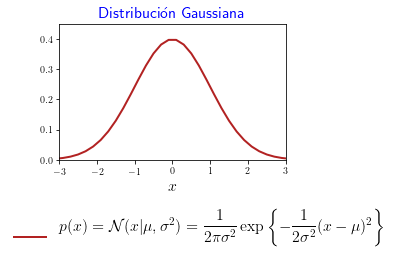

In [136]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

colores = {'dr':'darkred','fb':'firebrick','ir':'indianred','or':'orangered',
           'lc':'lightcoral','do':'darkorange','gr':'goldenrod','od':'olivedrab',
           'fg':'forestgreen','l':'lime','t':'teal','bv':'blueviolet','dv':'darkviolet',
           'oc':'orchid','dp':'deeppink','b':'blue','g':'green','r':'r'}

def CurvaGaussiana(mu,s,muestras=1000):
    x = np.linspace(-100,100,muestras)
    y = 1/(s * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * s**2))
    return x,y

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

mu=0.0
s=1.0
x,y=CurvaGaussiana(mu,s)

ax.axis([-3,3,0,0.45])
ax.plot(x, y,
        lw=2, 
        color=colores['fb'],
        ls='-',
       label=r'$\displaystyle p(x)=\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{2\pi\sigma^2}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}$')
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_title(r'Distribución Gaussiana', fontsize=16, color='b')
plt.legend(fontsize=16,loc=1,frameon=False,bbox_to_anchor=(1.5,-0.25))
plt.show()

La Gaussiana uni-dimensional:
$$
\displaystyle p(x|\mu,\sigma^2)=\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{2\pi\sigma^2}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(14)
$$

La Gaussiana multidimensional:
$$
\displaystyle p(\textrm{x}|\mathbf{\mu},\Sigma)=\mathcal{N}(\textrm{x}|\mathbf{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}\exp\left\{-\frac{1}{2}(\textrm{x}-\mu)^\textrm{T}\Sigma^{-1}(\textrm{x}-\mu)\right\}\;\;\;\;\;\;(15)
$$

* Supongamos que tenemos datos uni-dimensionales, cuyo origen desconocemos... 

In [108]:
def datos_misteriosos(n):
    x_= np.round(np.random.normal(1.5,0.5,n),2)
    for x in x_:
        yield x

#10 observaciones  
X=datos_misteriosos(10)
D=[]

for x in X:
    D.append(x)
D=np.array(D)
print(D)

[1.39 1.56 0.96 1.83 0.89 2.16 1.16 1.19 1.29 1.46]


* El objetivo es estimar los parámetros de su distribución, suponiendo que tienen una distribución Gaussiana.
* Para ello vamos a maximizar la función de verosimilitud (likelyhood), para N observaciones:

$$
\displaystyle p(\textrm{x}|\mu,\sigma^2)=\prod_{n=1}^{N}\mathcal{N}(x_n|\mu,\sigma^2)\;\;\;\;\;\;\;\;(16)
$$

* En estos casos es común calcular el $\log$(likelyhood):

$$
\displaystyle \ln p(\textrm{x}|\mu,\sigma^2)=-\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2 -\frac{N}{2}\ln \sigma^2 -\frac{N}{2}\ln (2\pi)\;\;\;\;\;\;\;\;(17)
$$

&#9758; Maximizando (17) con respecto a $\mu$, obtenemos:

$$
\displaystyle \mu_{ML}= \frac{1}{N}\sum_{n=1}^N x_n \;\;\;\;\;\;\;\;(18)
$$

&#9758; Maximizando (17) con respecto a $\sigma^2$, obtenemos:

$$
\displaystyle \sigma^2_{ML}= \frac{1}{N}\sum_{n=1}^N (x_n-\mu_{ML})^2 \;\;\;\;\;\;\;\;(19)
$$

&#9998; Define una función que estime calcule los parámetros $\mu_{ML}$ y $\sigma^2$ para nuestros datos $D$. Compara estos cálculos contra los que te da numpy.